<a href="https://colab.research.google.com/github/heysourin/NLP-101/blob/main/LSTM/TimeSeries-Milk-Sales/LSTM_Time_Series_Milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv('/content/monthly_milk_production.csv', index_col='Date', parse_dates=True)

"""
index_col='Date':
This parameter specifies that the column labeled Date in the CSV file should be used as the index of the DataFrame. This is crucial for time series analysis because it allows you to index your data by date.

parse_dates=True:
This parameter tells Pandas to parse the dates in the Date column. Without this, the dates would be read as strings, but with parse_dates=True, they are converted to datetime objects, which makes it easier to perform time series operations.
"""

"\nindex_col='Date':\nThis parameter specifies that the column labeled Date in the CSV file should be used as the index of the DataFrame. This is crucial for time series analysis because it allows you to index your data by date.\n\nparse_dates=True:\nThis parameter tells Pandas to parse the dates in the Date column. Without this, the dates would be read as strings, but with parse_dates=True, they are converted to datetime objects, which makes it easier to perform time series operations.\n"

In [22]:
df.index.freq = 'MS'
"""
df.index:
- We have already set index that is 'Date'.
- This accesses the index of the DataFrame df, which, after reading the CSV, is the Date column parsed as datetime objects.

.freq = 'MS':
This sets the frequency attribute of the Date index to 'MS', which stands for "Month Start". This means that the data is expected to have a monthly frequency, with each entry representing the start of the month.
"""

'\ndf.index:\n- We have already set index that is \'Date\'.\n- This accesses the index of the DataFrame df, which, after reading the CSV, is the Date column parsed as datetime objects.\n\n.freq = \'MS\':\nThis sets the frequency attribute of the Date index to \'MS\', which stands for "Month Start". This means that the data is expected to have a monthly frequency, with each entry representing the start of the month.\n'

In [23]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [24]:
df.shape

(168, 1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [26]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


<Axes: xlabel='Date'>

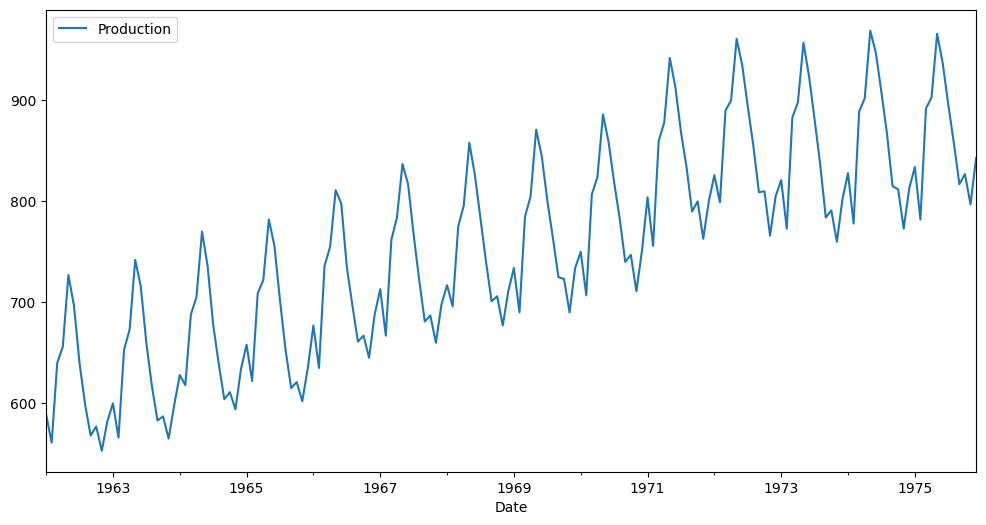

In [27]:
df.plot(figsize=(12,6))

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

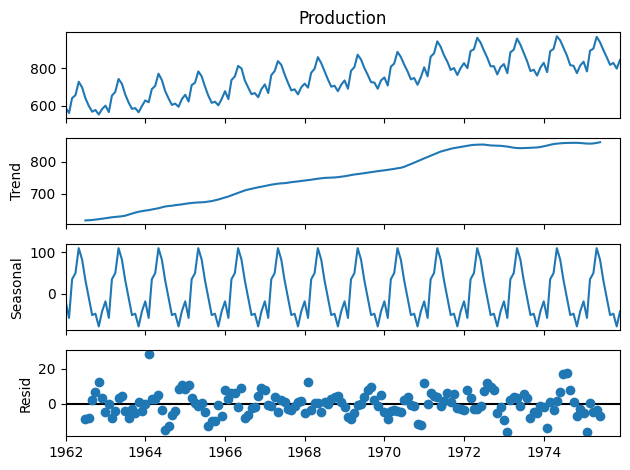

In [29]:
results = seasonal_decompose(df['Production'])
results.plot();

In [11]:
train = df.iloc[:156]
test = df.iloc[156:]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(), df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
X,y = generator[0]
print(f'Given the Array: {X.flatten()}')
print(f'Predict this y: {y}')
print(f'Shape of X: {X.shape}')

Given the Array: [0.08653846 0.01923077 0.20913462]
Predict this y: [[0.24759615]]
Shape of X: (1, 3, 1)


In [19]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [21]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(generator, epochs=15)

Epoch 1/15
144/144 [==============================] - 5s 12ms/step - loss: 0.0455
Epoch 2/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0241
Epoch 3/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0184
Epoch 4/15
144/144 [==============================] - 1s 10ms/step - loss: 0.0165
Epoch 5/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0107
Epoch 6/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0158
Epoch 7/15
144/144 [==============================] - 2s 12ms/step - loss: 0.0078
Epoch 8/15
144/144 [==============================] - 2s 15ms/step - loss: 0.0085
Epoch 9/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 10/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0043
Epoch 11/15
144/144 [==============================] - 1s 9ms/step - loss: 0.0038
Epoch 12/15
144/144 [==============================] - 1s 10ms/step - loss: 0.0039
Epoch 13/15
144/144 

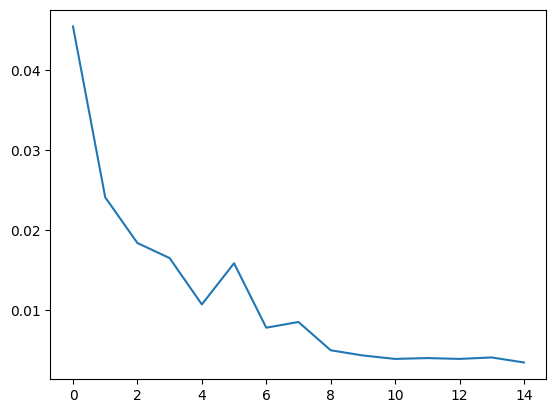

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
# Prediction
last_train_batch = scaled_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 207ms/step


array([[0.5592832]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 46ms/step


In [ ]:
test_predictions

[array([0.5592832], dtype=float32),
 array([0.58441687], dtype=float32),
 array([0.6570296], dtype=float32),
 array([0.7196475], dtype=float32),
 array([0.7782179], dtype=float32),
 array([0.78337306], dtype=float32),
 array([0.7456589], dtype=float32),
 array([0.66809464], dtype=float32),
 array([0.5997354], dtype=float32),
 array([0.5413136], dtype=float32),
 array([0.5134247], dtype=float32),
 array([0.5035323], dtype=float32)]

In [ ]:
test.head()


,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-84-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

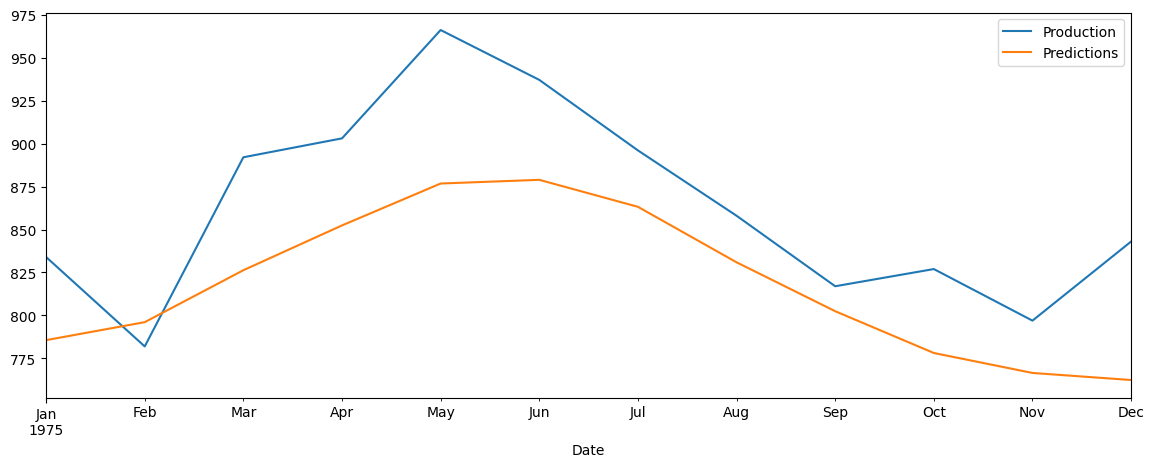

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

52.097750925747924
